In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
import MultiColumnLabelEncoder
from sklearn.metrics import classification_report

from sklearn.model_selection import KFold, GridSearchCV
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from prettytable import PrettyTable
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score,balanced_accuracy_score,recall_score, f1_score, precision_score, roc_auc_score,confusion_matrix, roc_curve

from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

pd.options.display.max_columns = 180

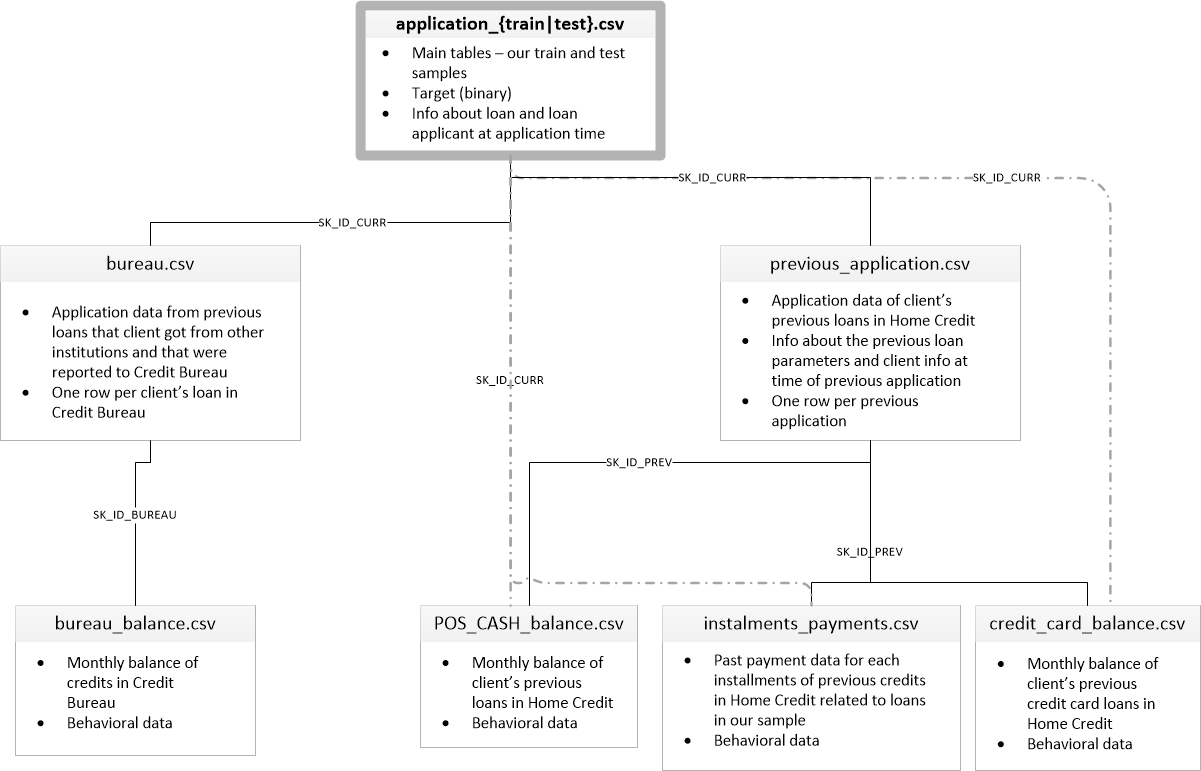

In [2]:
from PIL import Image
from IPython.display import display

path="./home_credit.png"
display(Image.open(path))

In [3]:
train_df = pd.read_csv('application_train.csv')
print('dimension : ', train_df.shape )
train_df.head(2)

dimension :  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
train_df.duplicated().sum()

0

In [6]:
def missing_values_table(df):
    mis_val = df.isnull().sum().sort_values(ascending=False)
        
# Percentage of missing values
    mis_val_percent  = (100 * df.isnull().sum() / len(df)).round(1)
        
# Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1, keys=['valeurs manquantes','Pourcentage %'])


    print('Nombre et pourcentage de valeurs manquantes:')
    

    return mis_val_table

In [7]:
missing_values_table(train_df).head(20)

Nombre et pourcentage de valeurs manquantes:


,valeurs manquantes,Pourcentage %
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4


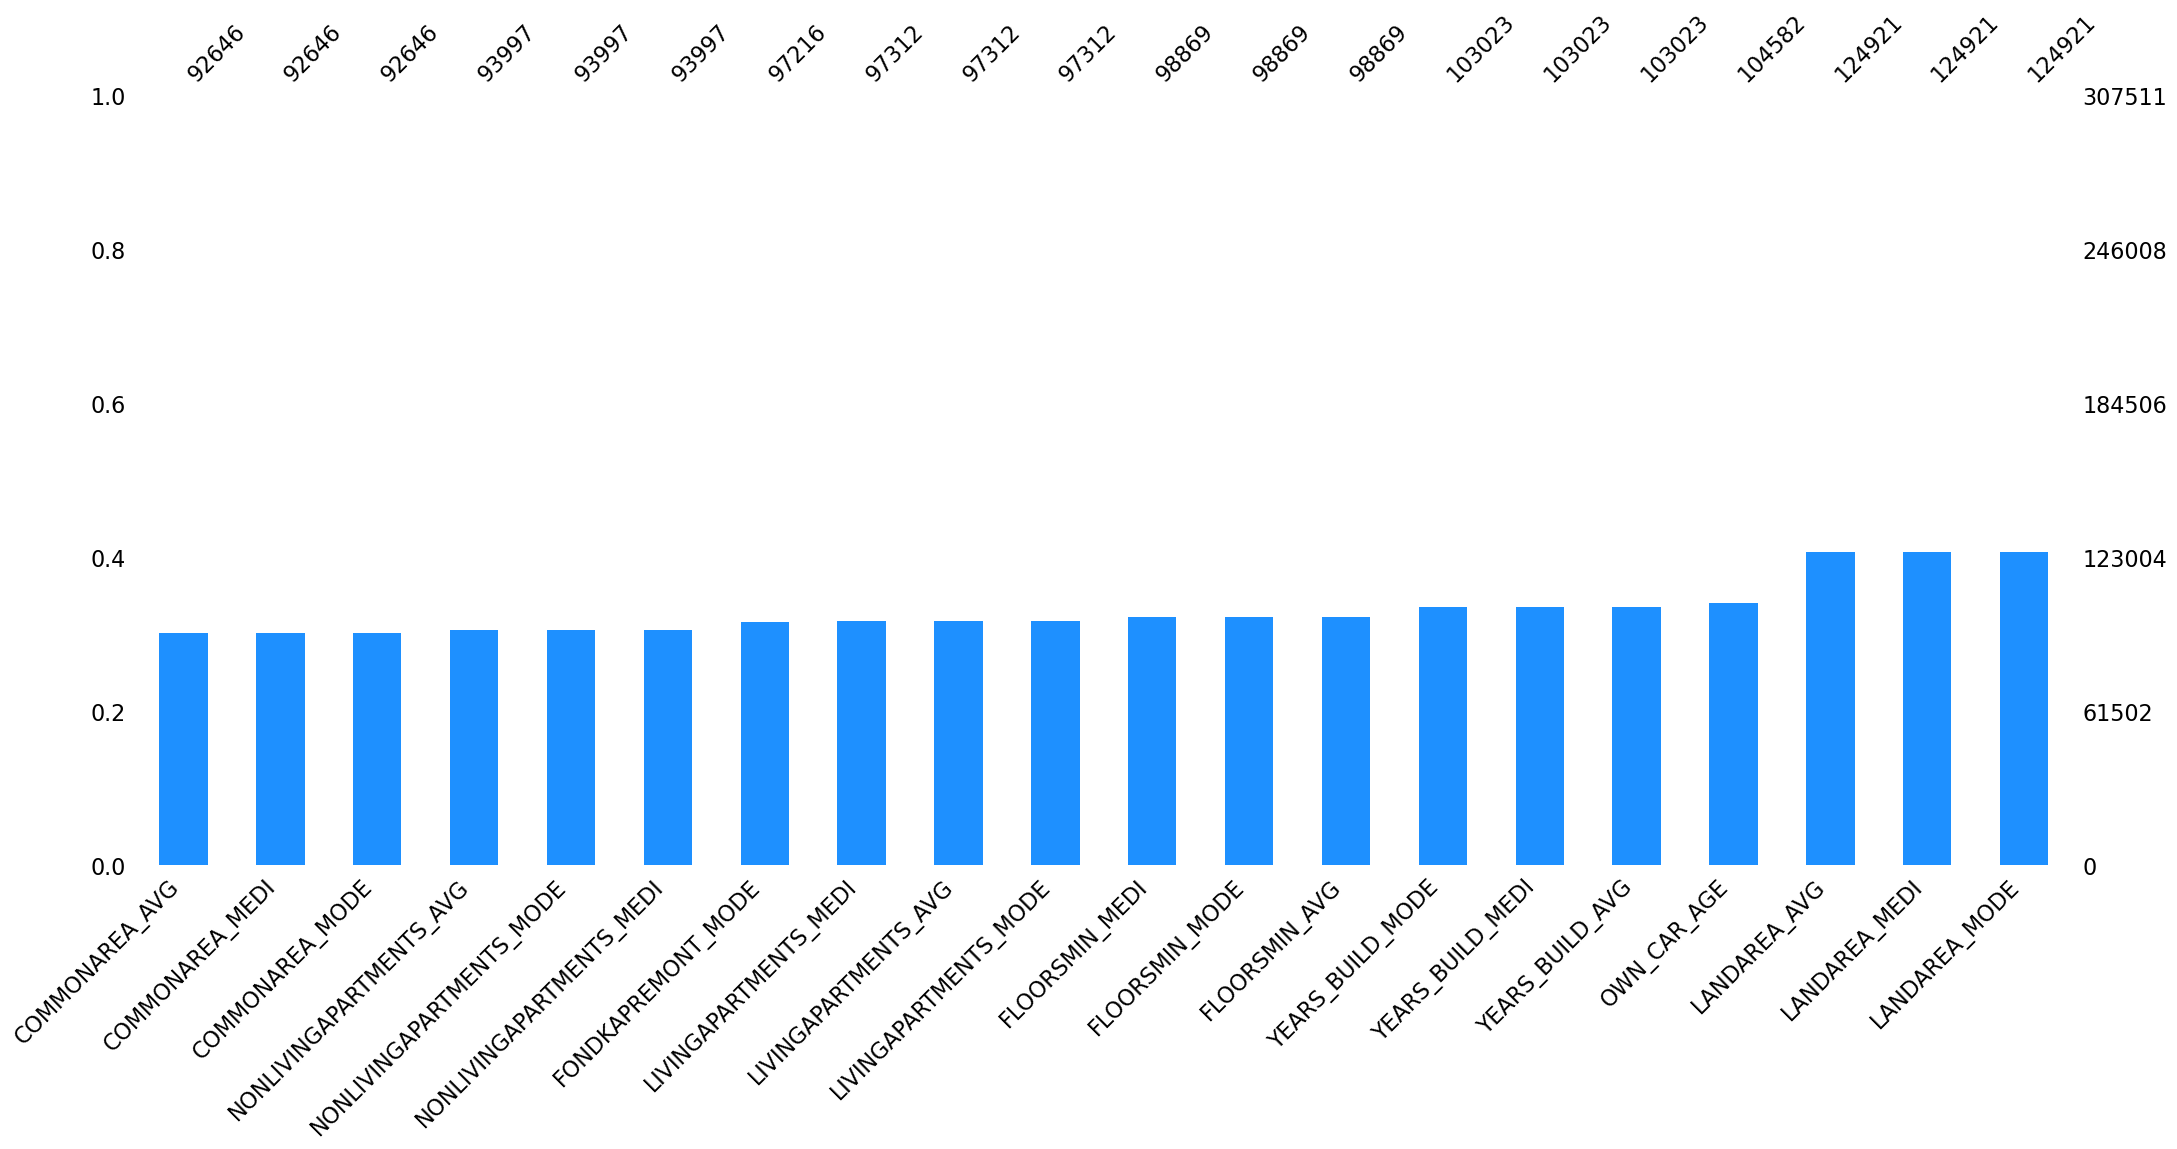

In [8]:
msno.bar(train_df,filter='bottom', n=20, sort="ascending",color="dodgerblue");

Supprimer les colonnes contenant plus de 50 % de valeurs manquantes.        

In [9]:
train = train_df.copy()
train = train.drop(train_df.columns[train.isnull().mean()>=0.5], axis=1)
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,

In [10]:
train.select_dtypes('object').columns.to_list()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE']

In [11]:
train['EMERGENCYSTATE_MODE'].value_counts(normalize=True, dropna=False)*100

No     51.844649
NaN    47.398304
Yes     0.757046
Name: EMERGENCYSTATE_MODE, dtype: float64

In [12]:
train = train.drop(['NAME_TYPE_SUITE','NAME_EDUCATION_TYPE','WEEKDAY_APPR_PROCESS_START','EMERGENCYSTATE_MODE'], axis=1)
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,1,1,15,0,0,0,0,0,0,Services,0.681632,NaN,0.9876,0.6042,0.9782,0.4583,0.9876,0.6042,0.2898,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,NaN,1.0,2,2,8,0,0,0,0,0,0,XNA,0.115992,NaN,0.9727

In [13]:
train.select_dtypes('number').columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'F

In [14]:
train = train.drop([ 'REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
                     'FLAG_MOBIL',
                     'FLAG_EMP_PHONE',
                     'FLAG_WORK_PHONE',
                     'FLAG_CONT_MOBILE',
                     'FLAG_PHONE',
                     'FLAG_EMAIL',
                     'REGION_RATING_CLIENT',
                     'REGION_RATING_CLIENT_W_CITY',
                     'HOUR_APPR_PROCESS_START',
                     'REG_REGION_NOT_LIVE_REGION',
                     'REG_REGION_NOT_WORK_REGION',
                     'LIVE_REGION_NOT_WORK_REGION',
                     'REG_CITY_NOT_LIVE_CITY',
                     'REG_CITY_NOT_WORK_CITY',
                     'LIVE_CITY_NOT_WORK_CITY',
                     'YEARS_BEGINEXPLUATATION_AVG',
                     'FLOORSMAX_AVG',
                     'YEARS_BEGINEXPLUATATION_MODE',
                     'FLOORSMAX_MODE',
                     'YEARS_BEGINEXPLUATATION_MEDI',
                     'FLOORSMAX_MEDI',
                     'TOTALAREA_MODE',
                     'AMT_REQ_CREDIT_BUREAU_HOUR',
                     'AMT_REQ_CREDIT_BUREAU_DAY',
                     'AMT_REQ_CREDIT_BUREAU_WEEK',
                     'AMT_REQ_CREDIT_BUREAU_MON',
                     'AMT_REQ_CREDIT_BUREAU_QRT',
                     'AMT_REQ_CREDIT_BUREAU_YEAR',
                     'OBS_30_CNT_SOCIAL_CIRCLE',
                     'DEF_30_CNT_SOCIAL_CIRCLE',
                     'OBS_60_CNT_SOCIAL_CIRCLE',
                     'DEF_60_CNT_SOCIAL_CIRCLE',
                     'DAYS_LAST_PHONE_CHANGE',], axis=1)

In [15]:
doc_list = train[['FLAG_DOCUMENT_2',
                 'FLAG_DOCUMENT_3',
                 'FLAG_DOCUMENT_4',
                 'FLAG_DOCUMENT_5',
                 'FLAG_DOCUMENT_6',
                 'FLAG_DOCUMENT_7',
                 'FLAG_DOCUMENT_8',
                 'FLAG_DOCUMENT_9',
                 'FLAG_DOCUMENT_10',
                 'FLAG_DOCUMENT_11',
                 'FLAG_DOCUMENT_12',
                 'FLAG_DOCUMENT_13',
                 'FLAG_DOCUMENT_14',
                 'FLAG_DOCUMENT_15',
                 'FLAG_DOCUMENT_16',
                 'FLAG_DOCUMENT_17',
                 'FLAG_DOCUMENT_18',
                 'FLAG_DOCUMENT_19',
                 'FLAG_DOCUMENT_20',
                 'FLAG_DOCUMENT_21',]]

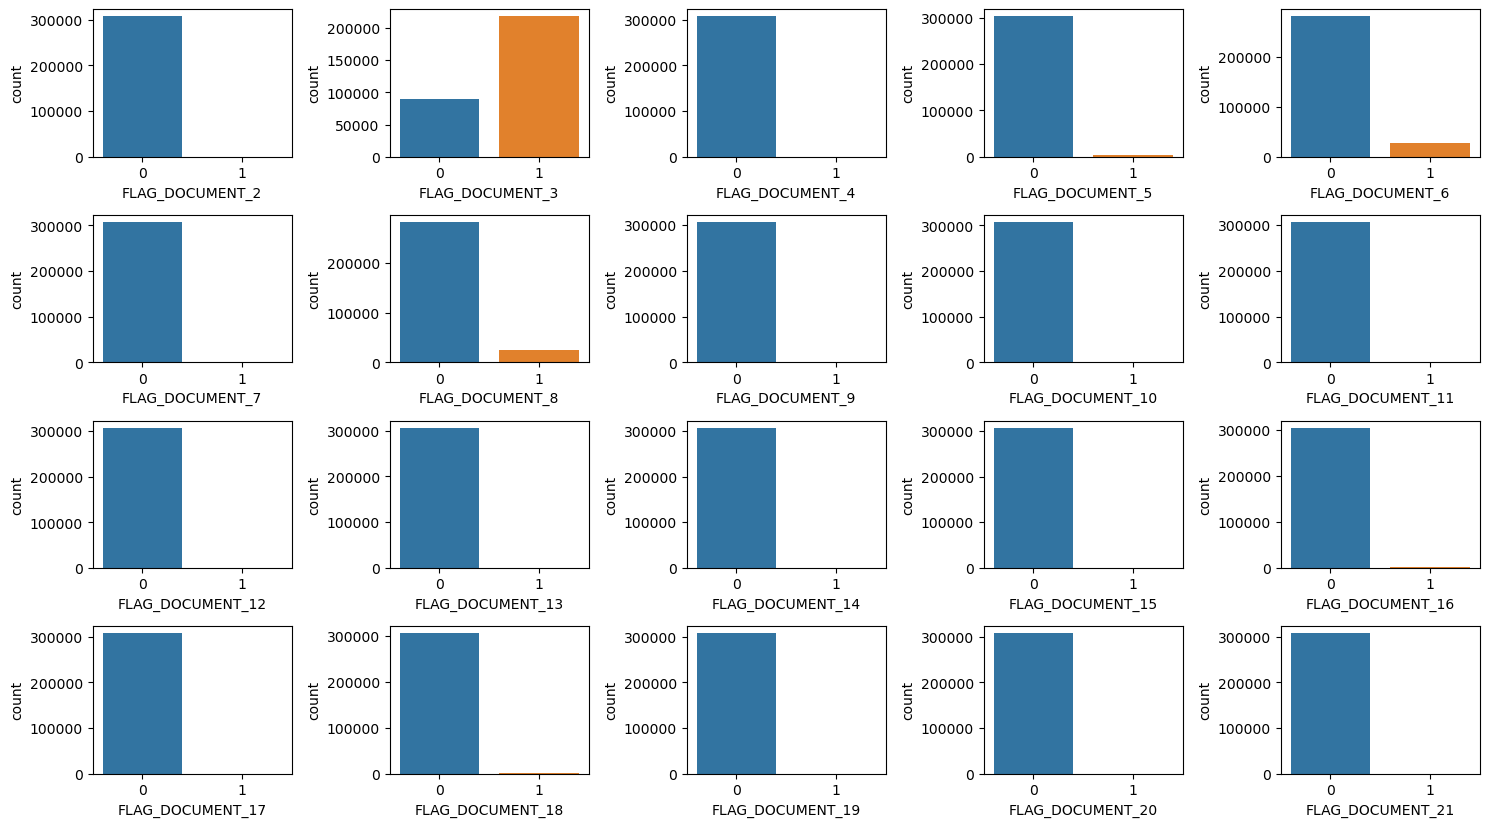

In [16]:
plt.figure(figsize = (15, 10))
plotnumber = 1

for column in doc_list:
    if plotnumber <= 20:
        ax = plt.subplot(5, 5, plotnumber)
        sns.countplot(x = doc_list[column])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [17]:
train = train.drop(['FLAG_DOCUMENT_2',
                 
                 'FLAG_DOCUMENT_4',
                 'FLAG_DOCUMENT_5',
                 
                 'FLAG_DOCUMENT_7',
                 
                 'FLAG_DOCUMENT_9',
                 'FLAG_DOCUMENT_10',
                 'FLAG_DOCUMENT_11',
                 'FLAG_DOCUMENT_12',
                 'FLAG_DOCUMENT_13',
                 'FLAG_DOCUMENT_14',
                 'FLAG_DOCUMENT_15',
                 'FLAG_DOCUMENT_16',
                 'FLAG_DOCUMENT_17',
                 'FLAG_DOCUMENT_18',
                 'FLAG_DOCUMENT_19',
                 'FLAG_DOCUMENT_20',
                 'FLAG_DOCUMENT_21',], axis=1)

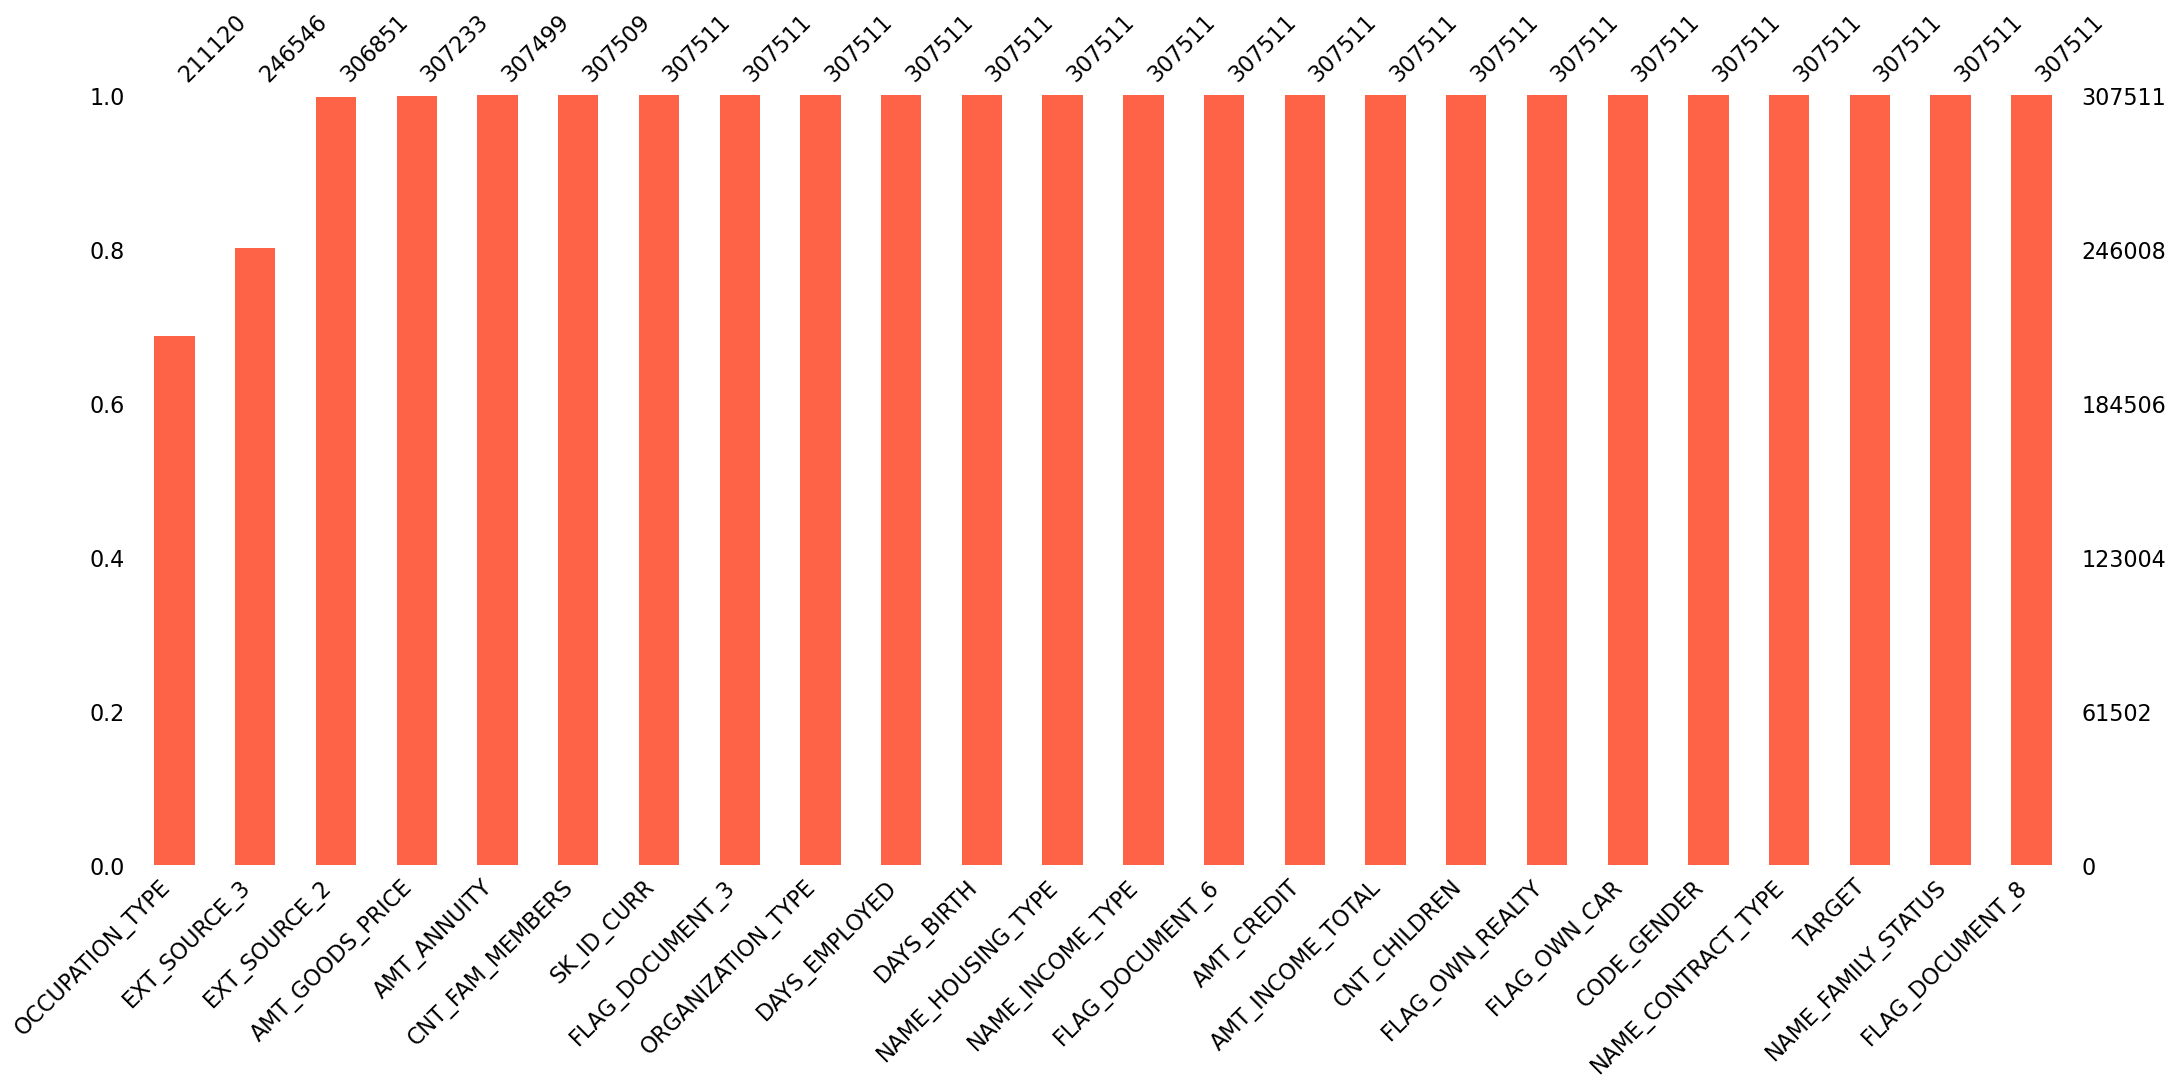

In [18]:
msno.bar(train, sort="ascending",color="tomato");

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SK_ID_CURR          307511 non-null  int64  
 1   TARGET              307511 non-null  int64  
 2   NAME_CONTRACT_TYPE  307511 non-null  object 
 3   CODE_GENDER         307511 non-null  object 
 4   FLAG_OWN_CAR        307511 non-null  object 
 5   FLAG_OWN_REALTY     307511 non-null  object 
 6   CNT_CHILDREN        307511 non-null  int64  
 7   AMT_INCOME_TOTAL    307511 non-null  float64
 8   AMT_CREDIT          307511 non-null  float64
 9   AMT_ANNUITY         307499 non-null  float64
 10  AMT_GOODS_PRICE     307233 non-null  float64
 11  NAME_INCOME_TYPE    307511 non-null  object 
 12  NAME_FAMILY_STATUS  307511 non-null  object 
 13  NAME_HOUSING_TYPE   307511 non-null  object 
 14  DAYS_BIRTH          307511 non-null  int64  
 15  DAYS_EMPLOYED       307511 non-nul

In [20]:
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Single / not married,House / apartment,-9461,-637,Laborers,1.0,Business Entity Type 3,0.262949,0.139376,1,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Married,House / apartment,-16765,-1188,Core staff,2.0,School,0.622246,NaN,1,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Single / not married,House / apartment,-19046,-225,Laborers,1.0,Government,0.555912,0.729567,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Civil marriage,House / apartment,-19005,-3039,Laborers,2.0,Business Entity Type 3,0.650442,NaN,1,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Single / not married,House / apartment,-19932,-3038,Core staff,1.0,Religion,0.322738,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,Separated,With parents,-9327,-236,Sales staff,1.0,Services,0.681632,NaN,0,0,1
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,Widow,House / apartment,-20775,365243,NaN,1.0,XNA,0.115992,NaN,1,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,Separated,House / apartment,-14966,-7921,Managers,1.0,School,0.535722,0.218859,1,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,Married,House / apartment,-11961,-4786,Laborers,2.0,Business Entity Type 1,0.514163,0.661024,1,0,0


In [21]:
train = train.fillna(train.median(numeric_only=True)!='SK_ID_CURR')
train.isna().sum()

SK_ID_CURR                0
TARGET                    0
NAME_CONTRACT_TYPE        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
AMT_CREDIT                0
AMT_ANNUITY               0
AMT_GOODS_PRICE           0
NAME_INCOME_TYPE          0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
DAYS_BIRTH                0
DAYS_EMPLOYED             0
OCCUPATION_TYPE       96391
CNT_FAM_MEMBERS           0
ORGANIZATION_TYPE         0
EXT_SOURCE_2              0
EXT_SOURCE_3              0
FLAG_DOCUMENT_3           0
FLAG_DOCUMENT_6           0
FLAG_DOCUMENT_8           0
dtype: int64

In [22]:
train['OCCUPATION_TYPE'] = train['OCCUPATION_TYPE'].fillna(train['OCCUPATION_TYPE'].mode()[0])
train.isna().sum()

SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
FLAG_OWN_REALTY       0
CNT_CHILDREN          0
AMT_INCOME_TOTAL      0
AMT_CREDIT            0
AMT_ANNUITY           0
AMT_GOODS_PRICE       0
NAME_INCOME_TYPE      0
NAME_FAMILY_STATUS    0
NAME_HOUSING_TYPE     0
DAYS_BIRTH            0
DAYS_EMPLOYED         0
OCCUPATION_TYPE       0
CNT_FAM_MEMBERS       0
ORGANIZATION_TYPE     0
EXT_SOURCE_2          0
EXT_SOURCE_3          0
FLAG_DOCUMENT_3       0
FLAG_DOCUMENT_6       0
FLAG_DOCUMENT_8       0
dtype: int64

In [23]:
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Single / not married,House / apartment,-9461,-637,Laborers,1.0,Business Entity Type 3,0.262949,0.139376,1,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Married,House / apartment,-16765,-1188,Core staff,2.0,School,0.622246,True,1,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Single / not married,House / apartment,-19046,-225,Laborers,1.0,Government,0.555912,0.729567,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Civil marriage,House / apartment,-19005,-3039,Laborers,2.0,Business Entity Type 3,0.650442,True,1,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Single / not married,House / apartment,-19932,-3038,Core staff,1.0,Religion,0.322738,True,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,Separated,With parents,-9327,-236,Sales staff,1.0,Services,0.681632,True,0,0,1
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,Widow,House / apartment,-20775,365243,Laborers,1.0,XNA,0.115992,True,1,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,Separated,House / apartment,-14966,-7921,Managers,1.0,School,0.535722,0.218859,1,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,Married,House / apartment,-11961,-4786,Laborers,2.0,Business Entity Type 1,0.514163,0.661024,1,0,0


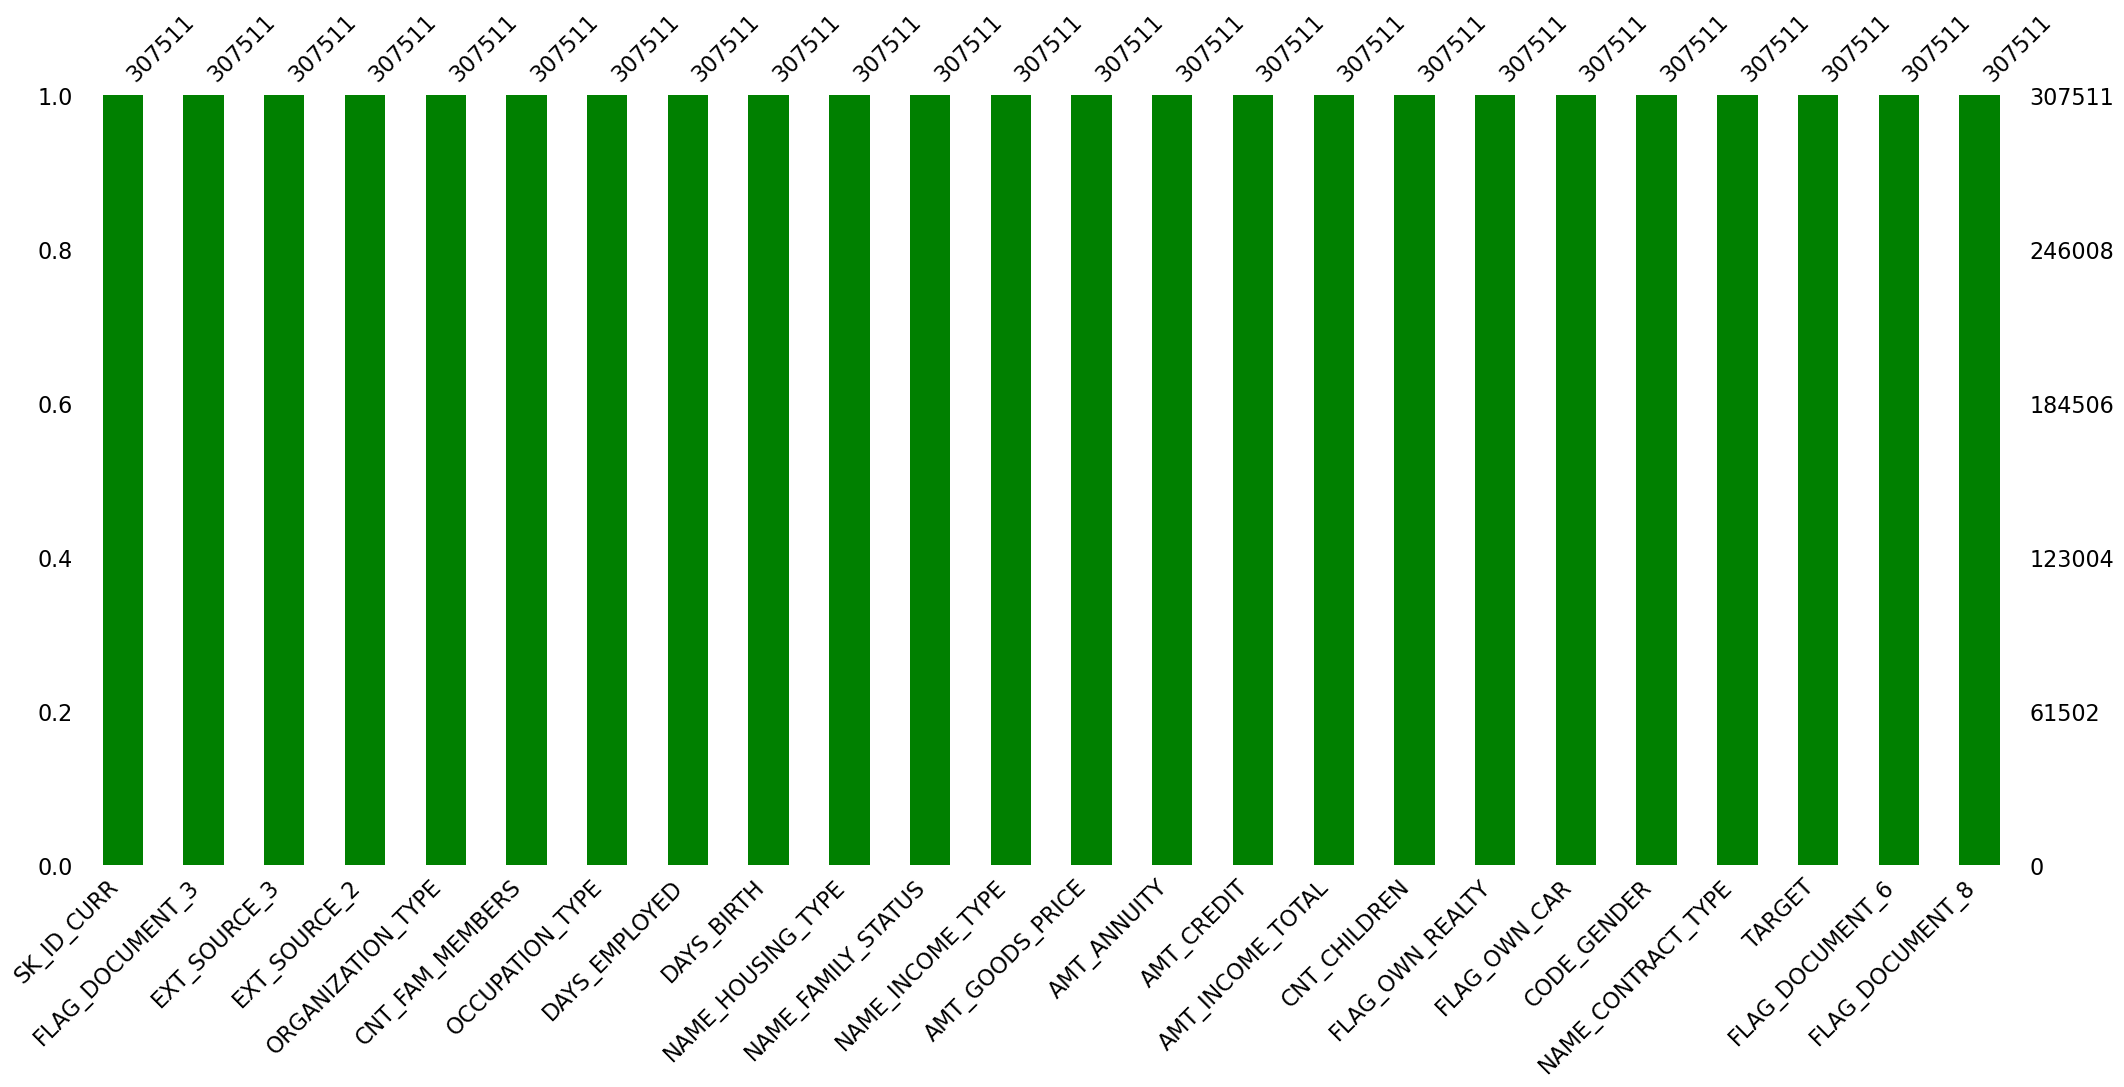

In [24]:
msno.bar(train, sort="ascending",color="green");

In [25]:
train.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

In [26]:
# Supprimer les lignes avec XNA dans CODE_GENDER

train = train[train['CODE_GENDER'] != 'XNA']
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Single / not married,House / apartment,-9461,-637,Laborers,1.0,Business Entity Type 3,0.262949,0.139376,1,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Married,House / apartment,-16765,-1188,Core staff,2.0,School,0.622246,True,1,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Single / not married,House / apartment,-19046,-225,Laborers,1.0,Government,0.555912,0.729567,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Civil marriage,House / apartment,-19005,-3039,Laborers,2.0,Business Entity Type 3,0.650442,True,1,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Single / not married,House / apartment,-19932,-3038,Core staff,1.0,Religion,0.322738,True,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,Separated,With parents,-9327,-236,Sales staff,1.0,Services,0.681632,True,0,0,1
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,Widow,House / apartment,-20775,365243,Laborers,1.0,XNA,0.115992,True,1,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,Separated,House / apartment,-14966,-7921,Managers,1.0,School,0.535722,0.218859,1,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,Married,House / apartment,-11961,-4786,Laborers,2.0,Business Entity Type 1,0.514163,0.661024,1,0,0


In [27]:
# train_ids = train['SK_ID_CURR']
# train = train.drop(columns=['SK_ID_CURR'])

In [28]:
# train_ids

In [29]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307507.0,278181.527256,102790.132982,100002.0,189146.5,278203.0,367143.5,456255.0
TARGET,307507.0,0.080730,0.272420,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307507.0,0.417047,0.722119,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307507.0,168797.685779,237124.627320,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307507.0,599028.596733,402492.601859,45000.0,270000.0,513531.0,808650.0,4050000.0
DAYS_BIRTH,307507.0,-16037.027271,4363.982424,-25229.0,-19682.0,-15750.0,-12413.0,-7489.0
DAYS_EMPLOYED,307507.0,63815.929208,141276.472519,-17912.0,-2760.0,-1213.0,-289.0,365243.0
FLAG_DOCUMENT_3,307507.0,0.710033,0.453748,0.0,0.0,1.0,1.0,1.0
FLAG_DOCUMENT_6,307507.0,0.088057,0.283378,0.0,0.0,0.0,0.0,1.0
FLAG_DOCUMENT_8,307507.0,0.081377,0.273414,0.0,0.0,0.0,0.0,1.0


In [30]:
# col_num = [col for col in train.columns if train[col].dtype != object]
# train.loc[:,col_num] = train.loc[:,col_num].abs()
train['DAYS_BIRTH'] = abs(train['DAYS_BIRTH'])
train['DAYS_EMPLOYED'] = abs(train['DAYS_EMPLOYED'])


In [31]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307507.0,278181.527256,102790.132982,100002.0,189146.5,278203.0,367143.5,456255.0
TARGET,307507.0,0.080730,0.272420,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307507.0,0.417047,0.722119,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307507.0,168797.685779,237124.627320,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307507.0,599028.596733,402492.601859,45000.0,270000.0,513531.0,808650.0,4050000.0
DAYS_BIRTH,307507.0,16037.027271,4363.982424,7489.0,12413.0,15750.0,19682.0,25229.0
DAYS_EMPLOYED,307507.0,67725.569893,139444.469301,0.0,933.0,2219.0,5707.0,365243.0
FLAG_DOCUMENT_3,307507.0,0.710033,0.453748,0.0,0.0,1.0,1.0,1.0
FLAG_DOCUMENT_6,307507.0,0.088057,0.283378,0.0,0.0,0.0,0.0,1.0
FLAG_DOCUMENT_8,307507.0,0.081377,0.273414,0.0,0.0,0.0,0.0,1.0


<Axes: xlabel='AMT_INCOME_TOTAL'>

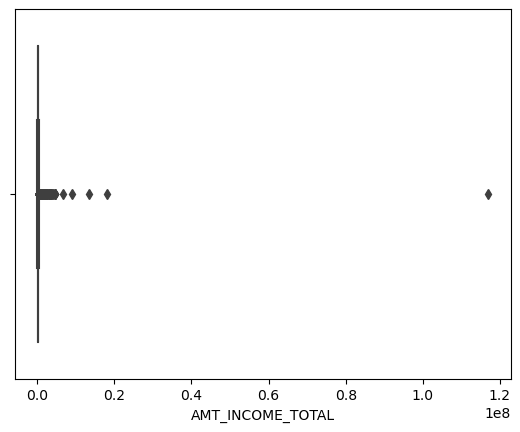

In [32]:
sns.boxplot(x=train['AMT_INCOME_TOTAL'])

<Axes: xlabel='AMT_CREDIT'>

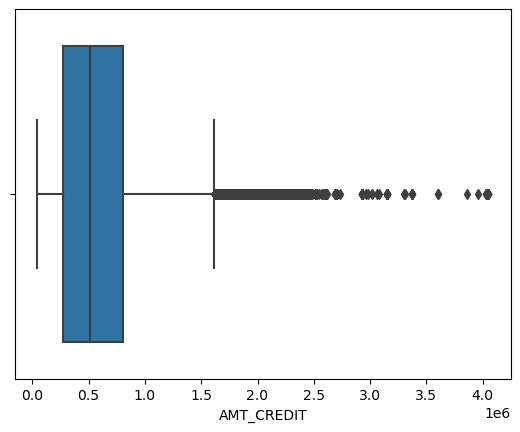

In [33]:
sns.boxplot(x=train['AMT_CREDIT'])

<Axes: xlabel='DAYS_EMPLOYED'>

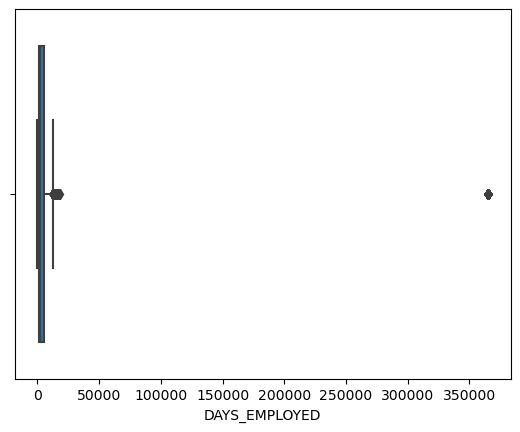

In [34]:
sns.boxplot(x=train['DAYS_EMPLOYED'])

In [35]:
def impute_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   upper = df[~(df>(q3+1.5*IQR))].max()

   lower = df[~(df<(q1-1.5*IQR))].min()

   df = np.where(df > upper,df.mean(),np.where(df < lower,df.mean(),df))
   return df

In [36]:
train['AMT_INCOME_TOTAL'] = impute_outliers_IQR(train['AMT_INCOME_TOTAL'])

In [37]:
train['DAYS_EMPLOYED'] = impute_outliers_IQR(train['DAYS_EMPLOYED'])

In [38]:
train['AMT_CREDIT'] = impute_outliers_IQR(train['AMT_CREDIT'])

In [39]:
train['DAYS_BIRTH'] = impute_outliers_IQR(train['DAYS_BIRTH'])

In [40]:
train.shape

(307507, 24)

In [41]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307507.0,278181.527256,102790.132982,100002.0,189146.5,278203.0,367143.5,4.562550e+05
TARGET,307507.0,0.080730,0.272420,0.0,0.0,0.0,0.0,1.000000e+00
CNT_CHILDREN,307507.0,0.417047,0.722119,0.0,0.0,0.0,1.0,1.900000e+01
AMT_INCOME_TOTAL,307507.0,154926.851710,62610.665581,25650.0,112500.0,147150.0,189000.0,3.375000e+05
AMT_CREDIT,307507.0,570600.699299,348972.226631,45000.0,270000.0,513531.0,781920.0,1.616278e+06
DAYS_BIRTH,307507.0,16037.027271,4363.982424,7489.0,12413.0,15750.0,19682.0,2.522900e+04
DAYS_EMPLOYED,307507.0,14322.031539,25377.326338,0.0,933.0,2219.0,5707.0,6.772557e+04
FLAG_DOCUMENT_3,307507.0,0.710033,0.453748,0.0,0.0,1.0,1.0,1.000000e+00
FLAG_DOCUMENT_6,307507.0,0.088057,0.283378,0.0,0.0,0.0,0.0,1.000000e+00
FLAG_DOCUMENT_8,307507.0,0.081377,0.273414,0.0,0.0,0.0,0.0,1.000000e+00


In [42]:
train.to_csv('my_df.csv', index=False)

## Data Exploration

## 1- Analyse univariée

In [43]:
target = train["TARGET"].value_counts()
target

0    282682
1     24825
Name: TARGET, dtype: int64

In [44]:
print("Pourcentage: ")
(train["TARGET"].value_counts()/train_df["TARGET"].count())*100

Pourcentage: 


0    91.925817
1     8.072882
Name: TARGET, dtype: float64

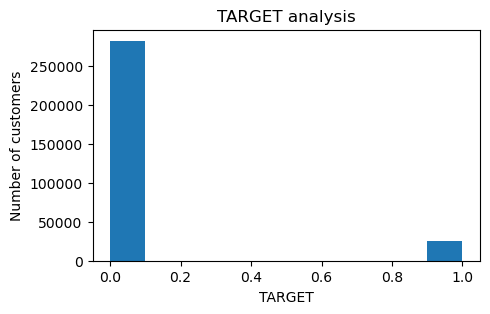

In [45]:
plt.figure(figsize=(5,3))
plt.hist(train['TARGET'].astype(int))
plt.title('TARGET analysis')
plt.xlabel('TARGET')
plt.ylabel('Number of customers')
plt.show()

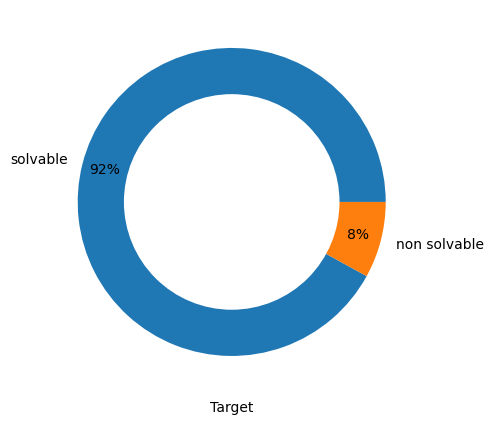

In [46]:
solv = ['solvable', 'non solvable']
data = [92, 8]
#my_colors = ['lightblue','silver']
fig = plt.figure(figsize =(8, 5))
plt.pie(data, labels = solv, autopct='%1.f%%', pctdistance=0.85)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 

fig.gca().add_artist(centre_circle)

plt.xlabel('Target')
plt.show()

Comme nous pouvons le constater, les données sont très déséquilibrées

### Distribution de AMT_CREDIT

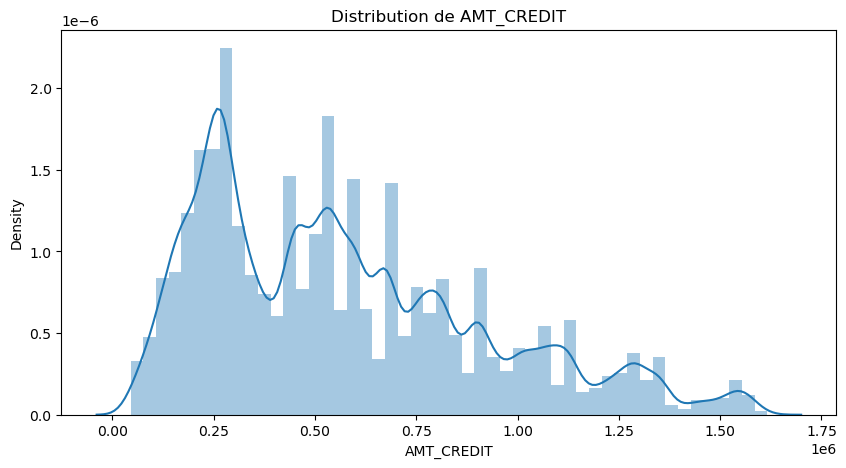

In [47]:
plt.figure(figsize=(10,5))
plt.title("Distribution de AMT_CREDIT")
ax = sns.distplot(train["AMT_CREDIT"])

### Distribution de AMT_INCOME_TOTAL

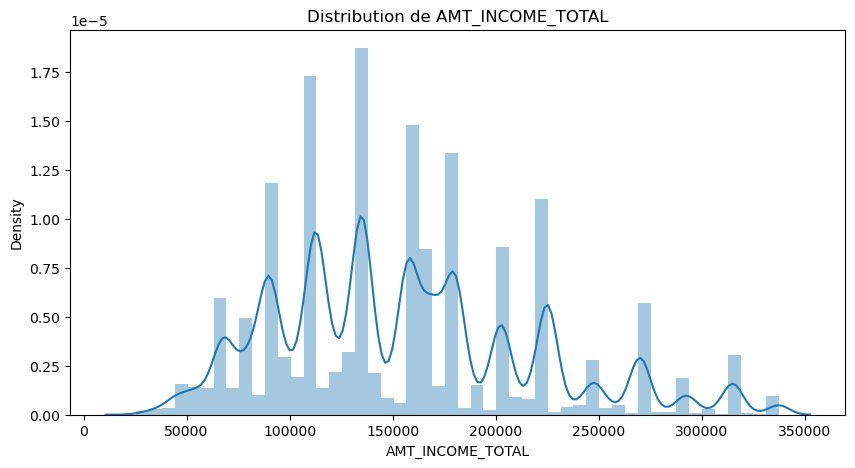

In [48]:
plt.figure(figsize=(10,5))
plt.title("Distribution de AMT_INCOME_TOTAL")
ax = sns.distplot(train["AMT_INCOME_TOTAL"])

NameError: name 'total' is not defined

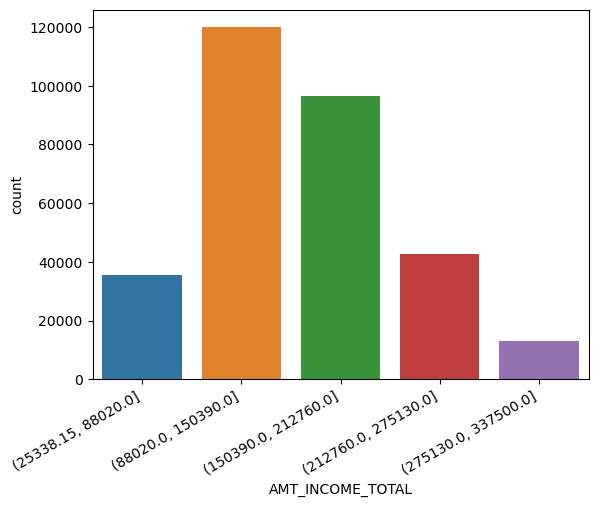

In [49]:
ax = sns.countplot(data = train, x = pd.cut(train.AMT_INCOME_TOTAL, bins=5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', size=12)
plt.show();

### Distribution de AMT_GOODS_PRICE

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Distribution de AMT_GOODS_PRICE")
ax = sns.distplot(train["AMT_GOODS_PRICE"])

### Genre

In [ ]:
train['CODE_GENDER'].value_counts(normalize=True, dropna=False)*100

In [ ]:
genre = ['femmes', 'hommes']
data = [66, 34]
#my_colors = ['lightblue','silver']
fig = plt.figure(figsize =(8, 5))
plt.pie(data, labels = genre, autopct='%1.f%%', pctdistance=0.85)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 

fig.gca().add_artist(centre_circle)

plt.xlabel('genre')
plt.show()

### tranche d'age des demandeurs

In [ ]:
ax = sns.countplot(data = train, x = pd.cut(train.DAYS_BIRTH/365, bins=5, precision=0))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', size=12)
plt.show()


### Types de prêts

In [ ]:
train['NAME_CONTRACT_TYPE'].value_counts(normalize=True, dropna=False)*100

In [ ]:
loan_type = ['Cash loans', 'Revolving loans']
data = [90.5, 9.5]
#my_colors = ['lightblue','silver']
fig = plt.figure(figsize =(8, 5))
plt.pie(data, labels = loan_type, autopct='%1.1f%%', pctdistance=0.85)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 

fig.gca().add_artist(centre_circle)

plt.xlabel('Types de prêts')
plt.show()

90,5 % des prêts sont des prêts de trésorerie.

### Objet du prêt

In [ ]:
train['FLAG_OWN_CAR'].value_counts(normalize=True, dropna=False)*100

In [ ]:
car = ['N', 'Y']
data = [66, 34]
#my_colors = ['lightblue','silver']
fig = plt.figure(figsize =(8, 5))
plt.pie(data, labels = car, autopct='%1.f%%', pctdistance=0.85)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 

fig.gca().add_artist(centre_circle)

plt.xlabel('Car')
plt.show()

In [ ]:
train['FLAG_OWN_REALTY'].value_counts(normalize=True, dropna=False)*100

In [ ]:
immob = ['Y', 'N']
data = [69.4, 30.6]
#my_colors = ['lightblue','silver']
fig = plt.figure(figsize =(8, 5))
plt.pie(data, labels = immob, autopct='%1.1f%%', pctdistance=0.85)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 

fig.gca().add_artist(centre_circle)

plt.xlabel('IMMOBILIER')
plt.show()

### Sources de revenus 

In [ ]:
train['NAME_INCOME_TYPE'].value_counts(normalize=True, dropna=False)*100

In [ ]:
Sources = ['Working', 'Commercial associate', 'Pensioner', 'State servant']
data = [51.6, 23.3, 18, 7.06]
#my_colors = ['lightblue','silver']
fig = plt.figure(figsize =(8, 5))

plt.pie(data, labels = Sources, autopct='%1.1f%%', pctdistance=0.85,)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 

fig.gca().add_artist(centre_circle)

plt.xlabel('Sources de revenus')
plt.show()

51,6 % des candidats ont mentionné qu'ils travaillaient. 23,3 % sont des associés commerciaux et 18 % sont des retraités...

### Situation familiale

In [ ]:
train['NAME_FAMILY_STATUS'].value_counts(normalize=True, dropna=False)*100

In [ ]:
FAMILY = ['Married ', 'Single / not married', 'Civil marriage', 'Separated', 'Widow']
data = [63.9, 14.8, 9.7, 6.4, 5.2]
#my_colors = ['lightblue','silver']
fig = plt.figure(figsize =(8, 5))

plt.pie(data, labels = FAMILY, autopct='%1.1f%%', pctdistance=0.85,)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 

fig.gca().add_artist(centre_circle)

plt.xlabel('Situation familiale')
plt.show()

63.9 % applicants are married. 14.8 % are single...

### Profession

In [ ]:
fig = plt.subplots(figsize=(12, 5))
ax=sns.countplot(data = train, x = 'OCCUPATION_TYPE', palette = 'tab10',)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', size=10)
plt.show();

Principaux candidats ayant demandé un prêt :

    - Ouvriers  (Env. 55 000 $) 
    - Personnel de vente  (Env. 32K) 
    - Personnel de base  (Env. 28K)
    - Gestionnaires  (Env. 21K)
    - Pilotes  (Env. 19K)

In [ ]:
fig = plt.subplots(figsize=(13, 10))
ax=sns.countplot(data = train, x = 'ORGANIZATION_TYPE', order=train['ORGANIZATION_TYPE'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='right');

Types du secteur de travail : 

- Entité commerciale de type 3 – Env. 68 K 

- Travailleur indépendant - Env. 38K

- Autres - Env. 17K

- Médecine - Env. 11K

## 2- Analyse par rapport au Target

### Genre

In [ ]:
plt.figure(figsize=(8,5))
total = float(len(train))
ax= sns.countplot(data = train, x = 'TARGET', hue = "CODE_GENDER")
plt.title('Genre', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', size=9)
plt.show()

### Age des demandeurs

In [ ]:
ax = sns.countplot(data=train,x=pd.cut(train.DAYS_BIRTH/365.25, bins=5,precision=0, right=True,retbins=False), hue="TARGET")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right');

### Sources de revenus

In [ ]:
plt.figure(figsize=(7,4))
total = float(len(train))
ax= sns.countplot(data = train, x = 'TARGET', hue = "NAME_INCOME_TYPE")
plt.title('Statut professionnel', fontsize=14)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', size=8)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

### Situation familiale

In [ ]:
plt.figure(figsize=(7,4))
total = float(len(train))
ax= sns.countplot(data = train, x = 'TARGET', hue = "NAME_FAMILY_STATUS")
plt.title('Statut familliale', fontsize=14)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', size=9)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

### Profession

In [ ]:
plt.figure(figsize=(7,5))
total = float(len(train))
ax= sns.countplot(data = train, x = 'TARGET', hue = "OCCUPATION_TYPE")
plt.title('TYPE DE PROFESSION', fontsize=14)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', size=7)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

## 3- Correlation 

In [ ]:
plt.figure(figsize = (16,10))

sns.heatmap(train.corr(),  vmin = -1, vmax = 1,annot = True, cmap = "Blues")


In [ ]:
# output = pd.DataFrame({'SK_ID_CURR': test_ids,
#                        'TARGET': lgb_2.predict_proba(x_test)[:,1]* 100})
# output